In [25]:
import pandas as pd
from textblob import TextBlob
import spacy
from gensim import models, corpora


df = pd.read_excel('virat.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['HourOfDay'] = df['Date'].dt.hour
df['CaptionLength'] = df['Caption'].astype(str).apply(lambda x: len(x))
df['Caption'] = df['Caption'].astype(str)
df['NumHashtags'] = df['Caption'].apply(lambda x: x.count('#'))
df['NumMentions'] = df['Caption'].apply(lambda x: x.count('@'))
df['Sentiment'] = df['Caption'].apply(lambda x: TextBlob(x).sentiment.polarity)
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'P'  # Positive
    elif polarity < 0:
        return 'N'  # Negative
    else:
        return 'ne'  # Neutral
df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)
df['LikesPerPost'] = df['Likes']/len(df)
df['CommentsPerPost'] = df['Comments']/len(df)
df['EngagementRate'] = (df['Likes'] + df['Comments']) / len(df)
captions = df['Caption'].astype(str).tolist()

# Named Entity Recognition (NER) using spaCy
nlp = spacy.load("en_core_web_sm")
ner_results = [nlp(caption).ents for caption in captions]

# Extract keywords using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


# Topic Modeling using Latent Dirichlet Allocation (LDA)
dictionary = corpora.Dictionary([caption.split() for caption in captions])
corpus = [dictionary.doc2bow(caption.split()) for caption in captions]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Example of extracting features
df['NumNER'] = [len(ner) for ner in ner_results]


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(captions)

# Extracting the actual number of keywords and their frequencies for each caption
keyword_frequencies = tfidf_matrix.getnnz(axis=1)
df['KeywordFrequencies'] = keyword_frequencies

df.head()                             

,Unnamed: 0,Post URL,Date,Caption,Likes,Comments,Location,DayOfWeek,Month,HourOfDay,CaptionLength,NumHashtags,NumMentions,Sentiment,SentimentCategory,LikesPerPost,CommentsPerPost,EngagementRate,NumNER,KeywordFrequencies
0,0,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-12 06:47:12,😍,6702842,55386,NaN,1,12,6,1,0,0,0.00000,ne,4018.490408,33.205036,4051.695444,0,0
1,1,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-12 03:52:57,❤️♾️,8835800,111441,NaN,1,12,3,4,0,0,0.00000,ne,5297.242206,66.811151,5364.053357,1,0
2,2,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-11 04:58:25,"Fueling greatness, one day at a time. I'm with...",819720,4322,NaN,0,12,4,121,4,1,0.00000,ne,491.438849,2.591127,494.029976,4,7
3,3,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-10 04:58:04,Reasons got nothing on this one.\nShop Wrogn a...,1140673,6025,NaN,6,12,4,185,4,2,0.00000,ne,683.856715,3.612110,687.468825,5,15
4,4,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-08 12:03:21,Don’t let poor-quality interiors be that extra...,1632553,6410,NaN,4,12,12,241,1,1,0.09375,P,978.748801,3.842926,982.591727,3,14


In [26]:
df.Date.head()

0   2023-12-12 06:47:12
1   2023-12-12 03:52:57
2   2023-12-11 04:58:25
3   2023-12-10 04:58:04
4   2023-12-08 12:03:21
Name: Date, dtype: datetime64[ns]

In [38]:
from datetime import datetime

# Assuming your 'Date' column in the DataFrame is df['Date']
date_list = df['Date']

# Convert Timestamp objects to strings and then convert to the new format
new_date_list = [pd.to_datetime(date).strftime("%Y-%m-%d_%H-%M-%S_UTC") for date in date_list]

# Print the new date list
print(new_date_list)

['2023-12-12_06-47-12_UTC', '2023-12-12_03-52-57_UTC', '2023-12-11_04-58-25_UTC', '2023-12-10_04-58-04_UTC', '2023-12-08_12-03-21_UTC', '2023-12-08_04-58-17_UTC', '2023-12-06_04-57-39_UTC', '2023-12-04_05-01-18_UTC', '2023-12-02_05-37-14_UTC', '2023-11-29_05-01-04_UTC', '2023-11-27_10-59-44_UTC', '2023-11-27_05-33-02_UTC', '2023-10-03_11-30-46_UTC', '2023-10-03_08-39-58_UTC', '2023-10-01_11-41-16_UTC', '2023-10-01_05-00-56_UTC', '2023-09-29_10-35-21_UTC', '2023-09-29_04-28-01_UTC', '2023-09-25_04-58-03_UTC', '2023-09-20_07-57-22_UTC', '2023-09-14_05-01-26_UTC', '2023-09-13_05-49-22_UTC', '2023-09-08_04-56-23_UTC', '2023-09-07_05-00-44_UTC', '2023-09-05_05-03-27_UTC', '2023-08-31_08-02-52_UTC', '2023-08-29_05-02-41_UTC', '2023-08-26_04-58-15_UTC', '2023-08-24_10-16-18_UTC', '2023-08-22_06-46-57_UTC', '2023-08-21_05-39-48_UTC', '2023-08-19_13-56-20_UTC', '2023-08-18_09-44-51_UTC', '2023-08-18_02-28-17_UTC', '2023-08-17_05-05-43_UTC', '2023-08-15_09-37-59_UTC', '2023-08-11_11-50-20_UTC', 

In [28]:
# extracting features- image quality - Sharpness, brightness, and contrast
from PIL import Image, ImageFilter
import numpy as np

s,b,c =[],[],[]
def calculate_image_quality(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert the image to grayscale
    img_gray = img.convert('L')

    # Calculate sharpness using the Laplacian operator
    sharpness = np.array(img_gray.filter(ImageFilter.FIND_EDGES)).var()

    # Calculate brightness
    brightness = np.array(img_gray).mean()

    # Calculate contrast
    contrast = np.array(img_gray).std()

    return sharpness, brightness, contrast

# Example usage
for i in new_date_list:
    try:
        sharpness, brightness, contrast = calculate_image_quality('virat.kohli/{}.jpg'.format(i))
        s.append(sharpness)
        b.append(brightness)
        c.append(contrast)
    except:
        try:
            sharpness, brightness, contrast = calculate_image_quality('virat.kohli/{}_1.jpg'.format(i))
            s.append(sharpness)
            b.append(brightness)
            c.append(contrast)
        except:
            s.append(0)
            b.append(0)
            c.append(0)

In [29]:
df['sharpness']=s
df['brightness']= b
df['contrast'] = c

In [37]:
df.shape

(1668, 23)

In [39]:
#object detection from images
import torch
from pathlib import Path
from ultralytics import YOLO
from PIL import Image

# Load YOLOv5 model
model = YOLO("yolov8m.pt")

# Define the path to your image or directory containing images
# img_path = 'virat.kohli/2015-06-23_06-23-25_UTC.jpg'

def detect_objects(img_path):
    # Perform inference on the image
    results = model.predict(img_path)
    result = results[0]
    c=0
    d={}
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
    #   cords = box.xyxy[0].tolist()
    #   cords = [round(x) for x in cords]
    #   conf = round(box.conf[0].item(), 2)
        if d.get(class_id):
            d[class_id] = d[class_id]+1
        else:
            d[class_id] =1
        print("Object type:", class_id)
        c=c+1

    #   print("Coordinates:", cords)
    #   print("Probability:", conf)
    #   print("---")
    return c,d

no_of_objects =[]
dict_of_objects =[]
without_people =[]

for i in new_date_list:
    try:
        a,b= detect_objects('virat.kohli/{}.jpg'.format(i))
        no_of_objects.append(a)
        dict_of_objects.append(b)
        if b.get('person'):
            without_people.append(0)
        else:
            without_people.append(1)

    except:
        try:
            a,b = detect_objects('virat.kohli/{}_1.jpg'.format(i))
            no_of_objects.append(a)
            dict_of_objects.append(b)
            if b.get('person'):
                without_people.append(0)
            else:
                without_people.append(1)
        except:
            no_of_objects.append(0)
            dict_of_objects.append(0)
            without_people.append(1)



image 1/1 c:\Users\isita\Downloads\DML Assignment\virat.kohli\2023-12-12_06-47-12_UTC.jpg: 640x512 3 persons, 1 chair, 1 potted plant, 492.6ms
Speed: 18.0ms preprocess, 492.6ms inference, 24.2ms postprocess per image at shape (1, 3, 640, 512)
Object type: person
Object type: potted plant
Object type: chair
Object type: person
Object type: person

image 1/1 c:\Users\isita\Downloads\DML Assignment\virat.kohli\2023-12-12_03-52-57_UTC.jpg: 640x512 1 person, 1 potted plant, 349.0ms
Speed: 5.2ms preprocess, 349.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)
Object type: person
Object type: potted plant

image 1/1 c:\Users\isita\Downloads\DML Assignment\virat.kohli\2023-12-11_04-58-25_UTC.jpg: 640x384 4 persons, 1 backpack, 264.8ms
Speed: 4.0ms preprocess, 264.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 384)
Object type: person
Object type: person
Object type: person
Object type: backpack
Object type: person

image 1/1 c:\Users\isita\Downloads\DML As

In [40]:
len(no_of_objects), len(dict_of_objects), len(without_people)

(1668, 1668, 1668)

In [41]:
df.head()

,Unnamed: 0,Post URL,Date,Caption,Likes,Comments,Location,DayOfWeek,Month,HourOfDay,...,Sentiment,SentimentCategory,LikesPerPost,CommentsPerPost,EngagementRate,NumNER,KeywordFrequencies,sharpness,brightness,contrast
0,0,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-12 06:47:12,😍,6702842,55386,NaN,1,12,6,...,0.00000,ne,4018.490408,33.205036,4051.695444,0,0,308.411084,84.308680,63.470475
1,1,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-12 03:52:57,❤️♾️,8835800,111441,NaN,1,12,3,...,0.00000,ne,5297.242206,66.811151,5364.053357,1,0,855.695867,158.861842,98.216702
2,2,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-11 04:58:25,"Fueling greatness, one day at a time. I'm with...",819720,4322,NaN,0,12,4,...,0.00000,ne,491.438849,2.591127,494.029976,4,7,687.332995,113.504306,64.250321
3,3,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-10 04:58:04,Reasons got nothing on this one.\nShop Wrogn a...,1140673,6025,NaN,6,12,4,...,0.00000,ne,683.856715,3.612110,687.468825,5,15,1476.698342,107.159990,56.787725
4,4,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-08 12:03:21,Don’t let poor-quality interiors be that extra...,1632553,6410,NaN,4,12,12,...,0.09375,P,978.748801,3.842926,982.591727,3,14,80.979252,23.691430,33.982392


In [42]:
df.shape

(1668, 23)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1668 non-null   int64         
 1   Post URL            1668 non-null   object        
 2   Date                1668 non-null   datetime64[ns]
 3   Caption             1668 non-null   object        
 4   Likes               1668 non-null   int64         
 5   Comments            1668 non-null   int64         
 6   Location            0 non-null      float64       
 7   DayOfWeek           1668 non-null   int32         
 8   Month               1668 non-null   int32         
 9   HourOfDay           1668 non-null   int32         
 10  CaptionLength       1668 non-null   int64         
 11  NumHashtags         1668 non-null   int64         
 12  NumMentions         1668 non-null   int64         
 13  Sentiment           1668 non-null   float64     

In [44]:
df['posts_without_people'] = without_people

In [45]:
df['number_of_objects'] = no_of_objects
df['dict_of_objects'] = dict_of_objects

In [46]:
df['Year'] = df['Date'].dt.year

In [48]:
dict_of_objects

[{'person': 3, 'potted plant': 1, 'chair': 1},
 {'person': 1, 'potted plant': 1},
 {'person': 4, 'backpack': 1},
 {'person': 1, 'cell phone': 1},
 {'person': 2, 'bottle': 1},
 {'person': 2},
 {'person': 1, 'chair': 1},
 {'person': 1},
 {'person': 1},
 {'person': 2, 'bottle': 1, 'couch': 1},
 {'person': 2},
 {'person': 1},
 {'airplane': 1, 'boat': 2},
 {'person': 1},
 {'person': 2, 'couch': 1, 'bottle': 1, 'remote': 1},
 {'person': 1, 'book': 1},
 {'person': 1, 'tv': 2, 'car': 1},
 {'person': 1, 'pizza': 1, 'teddy bear': 1},
 {'person': 1},
 {'person': 1},
 {'suitcase': 1, 'person': 1},
 {'person': 1},
 {'person': 1, 'truck': 1},
 {'person': 2, 'wine glass': 2},
 {'person': 1},
 {'person': 1},
 {'person': 1, 'bed': 1},
 {'person': 1, 'cell phone': 1, 'potted plant': 1},
 {'person': 1, 'backpack': 1},
 {'person': 2},
 {'person': 1},
 {'person': 1, 'motorcycle': 1},
 {'person': 5},
 {'person': 2, 'tie': 1, 'book': 1},
 {'person': 1},
 {'person': 2, 'laptop': 1, 'potted plant': 1, 'chair':

In [50]:
number_of_faces = []
for i in dict_of_objects:
    try:
        if i.get('person'):
            number_of_faces.append(i['person'])
        else:
            number_of_faces.append(0)
    except:
        number_of_faces.append(0)
number_of_faces

[3,
 1,
 4,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 5,
 2,
 1,
 2,
 4,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 12,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 8,
 1,
 2,
 5,
 1,
 1,
 1,
 3,
 1,
 0,
 5,
 6,
 1,
 1,
 1,
 15,
 1,
 6,
 7,
 1,
 4,
 1,
 9,
 3,
 6,
 6,
 1,
 10,
 1,
 3,
 1,
 2,
 1,
 2,
 9,
 1,
 11,
 1,
 0,
 3,
 3,
 7,
 7,
 1,
 2,
 8,
 3,
 1,
 3,
 2,
 5,
 1,
 1,
 2,
 0,
 1,
 6,
 1,
 10,
 2,
 1,
 2,
 1,
 3,
 4,
 4,
 7,
 2,
 6,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 9,
 2,
 11,
 3,
 18,
 2,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 12,
 1,
 29,
 2,
 11,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 19,
 11,
 16,
 1,
 9,
 3,
 1,
 11,
 1,
 19,
 3,
 2,
 1,
 1,
 1,
 6,
 2,
 1,
 15,
 21,
 1,
 1,
 5,
 2,
 1,
 1,
 2,
 1,
 12,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 13,
 3,
 4,
 1,
 1,
 1,
 1,
 2,
 24,
 1,
 7,
 7,
 6,
 1,
 11,
 7,
 9,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 7,
 5,
 2,
 13,
 1,
 5,
 3,
 1,
 2,
 4,
 1,
 14,
 1,
 1,
 16,
 4,
 8,
 2,


In [51]:
df.columns

Index(['Unnamed: 0', 'Post URL', 'Date', 'Caption', 'Likes', 'Comments',
       'Location', 'DayOfWeek', 'Month', 'HourOfDay', 'CaptionLength',
       'NumHashtags', 'NumMentions', 'Sentiment', 'SentimentCategory',
       'LikesPerPost', 'CommentsPerPost', 'EngagementRate', 'NumNER',
       'KeywordFrequencies', 'sharpness', 'brightness', 'contrast',
       'posts_without_people', 'number_of_objects', 'dict_of_objects', 'Year'],
      dtype='object')

In [52]:
df['number_of_faces'] = number_of_faces
df.head()

,Unnamed: 0,Post URL,Date,Caption,Likes,Comments,Location,DayOfWeek,Month,HourOfDay,...,NumNER,KeywordFrequencies,sharpness,brightness,contrast,posts_without_people,number_of_objects,dict_of_objects,Year,number_of_faces
0,0,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-12 06:47:12,😍,6702842,55386,NaN,1,12,6,...,0,0,308.411084,84.308680,63.470475,0,5,"{'person': 3, 'potted plant': 1, 'chair': 1}",2023,3
1,1,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-12 03:52:57,❤️♾️,8835800,111441,NaN,1,12,3,...,1,0,855.695867,158.861842,98.216702,0,2,"{'person': 1, 'potted plant': 1}",2023,1
2,2,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-11 04:58:25,"Fueling greatness, one day at a time. I'm with...",819720,4322,NaN,0,12,4,...,4,7,687.332995,113.504306,64.250321,0,5,"{'person': 4, 'backpack': 1}",2023,4
3,3,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-10 04:58:04,Reasons got nothing on this one.\nShop Wrogn a...,1140673,6025,NaN,6,12,4,...,5,15,1476.698342,107.159990,56.787725,0,2,"{'person': 1, 'cell phone': 1}",2023,1
4,4,https://scontent-hou1-1.cdninstagram.com/v/t51...,2023-12-08 12:03:21,Don’t let poor-quality interiors be that extra...,1632553,6410,NaN,4,12,12,...,3,14,80.979252,23.691430,33.982392,0,3,"{'person': 2, 'bottle': 1}",2023,2


In [53]:
# as the column only has NaN values
df.drop(columns='Location', inplace=True)

In [56]:
df.drop(columns='Unnamed: 0', inplace=True)

In [54]:
df['SentimentCategory'].unique()

array(['ne', 'P', 'N'], dtype=object)

In [55]:
#we have made Negative reviews as "neutral" after analysis -(most comments aren't direct they're sarcastic and neutral)
df['SentimentCategory'].replace("N","ne",inplace=True)

In [31]:
df.to_excel('virat_data_feature_engineering.xlsx')

In [32]:
df.columns

Index(['Unnamed: 0', 'Post URL', 'Date', 'Caption', 'Likes', 'Comments',
       'Location', 'DayOfWeek', 'Month', 'HourOfDay', 'CaptionLength',
       'NumHashtags', 'NumMentions', 'Sentiment', 'SentimentCategory',
       'LikesPerPost', 'CommentsPerPost', 'EngagementRate', 'NumNER',
       'KeywordFrequencies', 'sharpness', 'brightness', 'contrast',
       'number_of_faces'],
      dtype='object')

In [ ]:
df['SentimentCategory'].replace('P', 1, inplace=True)
df['SentimentCategory'].replace('N', 2, inplace=True)
df['SentimentCategory'].replace('ne', 3, inplace=True)

In [35]:
df = pd.read_excel('virat_data_feature_engineering.xlsx')

In [57]:
df.columns

Index(['Post URL', 'Date', 'Caption', 'Likes', 'Comments', 'DayOfWeek',
       'Month', 'HourOfDay', 'CaptionLength', 'NumHashtags', 'NumMentions',
       'Sentiment', 'SentimentCategory', 'LikesPerPost', 'CommentsPerPost',
       'EngagementRate', 'NumNER', 'KeywordFrequencies', 'sharpness',
       'brightness', 'contrast', 'posts_without_people', 'number_of_objects',
       'dict_of_objects', 'Year', 'number_of_faces'],
      dtype='object')

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Define features and target
df['SentimentCategory'].replace('P', 1, inplace=True)
df['SentimentCategory'].replace('N', 2, inplace=True)
df['SentimentCategory'].replace('ne', 3, inplace=True)

X = df[['DayOfWeek','Year','Month', 'HourOfDay', 'CaptionLength', 'NumHashtags', 'NumMentions', 'Sentiment', 'SentimentCategory', 'NumNER',
        'KeywordFrequencies', 'sharpness', 'brightness', 'contrast', 'number_of_faces']]
y = df[['Likes', 'Comments']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Standardize/Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
model = models.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='linear'))  # Two output neurons for Likes and Comments

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define callbacks (optional)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model.predict(X_test_reshaped)

y_pred

Epoch 1/500
34/34 [==============================] - 3s 18ms/step - loss: 3404448137216.0000 - mae: 967567.1250 - val_loss: 3122107777024.0000 - val_mae: 922671.8750
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 3404446040064.0000 - mae: 967566.6250 - val_loss: 3122104631296.0000 - val_mae: 922670.8125
Epoch 3/500
34/34 [==============================] - 0s 5ms/step - loss: 3404440272896.0000 - mae: 967564.3750 - val_loss: 3122094145536.0000 - val_mae: 922666.4375
Epoch 4/500
34/34 [==============================] - 0s 5ms/step - loss: 3404419825664.0000 - mae: 967556.2500 - val_loss: 3122062163968.0000 - val_mae: 922653.1250
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 3404367659008.0000 - mae: 967535.1250 - val_loss: 3121988239360.0000 - val_mae: 922621.3750
Epoch 6/500
34/34 [==============================] - 0s 8ms/step - loss: 3404260442112.0000 - mae: 967490.5625 - val_loss: 3121851924480.0000 - val_mae: 922560.6250
Epoch 7/5

array([[ 1.2646e+06,        8527],
       [  1.065e+06,      7180.1],
       [ 4.0648e+06,       27265],
       [ 2.9331e+06,       19680],
       [ 1.7052e+05,      1148.7],
       [ 4.8817e+06,       32727],
       [ 1.3385e+06,      9031.5],
       [ 4.7078e+06,       31573],
       [ 1.5868e+06,       10707],
       [ 1.2507e+06,      8447.9],
       [ 1.4547e+06,      9829.7],
       [ 5.0382e+05,        3397],
       [ 2.3364e+06,       15704],
       [ 4.4052e+06,       29563],
       [ 2.6077e+06,       17530],
       [  1.299e+06,      8775.6],
       [ 1.7851e+06,       12021],
       [ 5.3065e+06,       35583],
       [ 3.2135e+06,       21578],
       [ 2.3061e+06,       15478],
       [ 1.1887e+06,      8031.6],
       [ 1.4176e+06,      9544.2],
       [ 4.4697e+05,      3012.1],
       [ 1.4457e+06,      9715.9],
       [  5.176e+06,       34707],
       [ 1.4905e+05,      1003.3],
       [ 1.5117e+06,       10207],
       [ 5.4116e+06,       36285],
       [ 3.7163e+06,

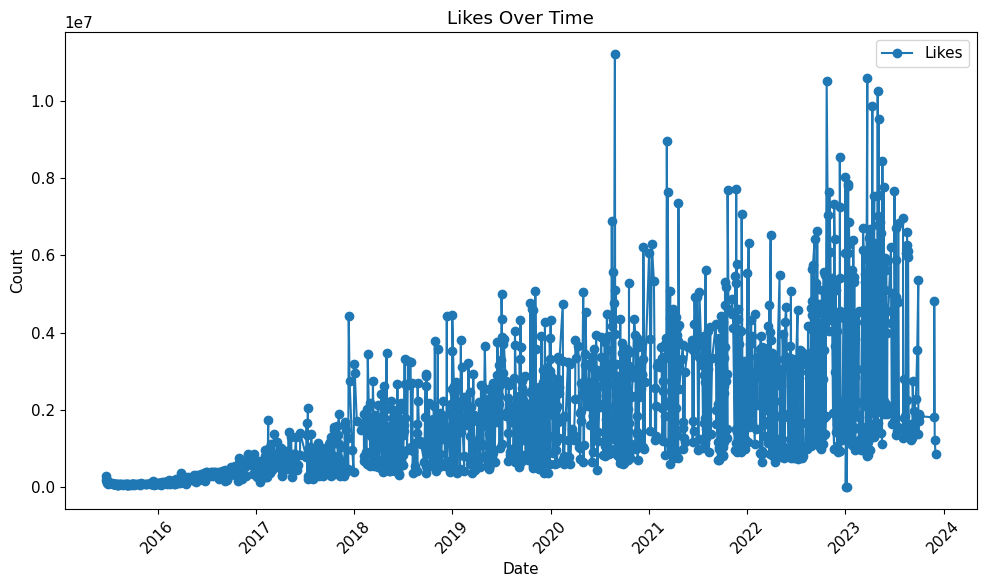

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Date', 'Likes', and 'Comments'
df = df.sort_values(by='Date')

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df['Date'], df['Likes'], label='Likes', marker='o')
# plt.plot(df['Date'], df['Comments'], label='Comments', marker='o')

plt.title('Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


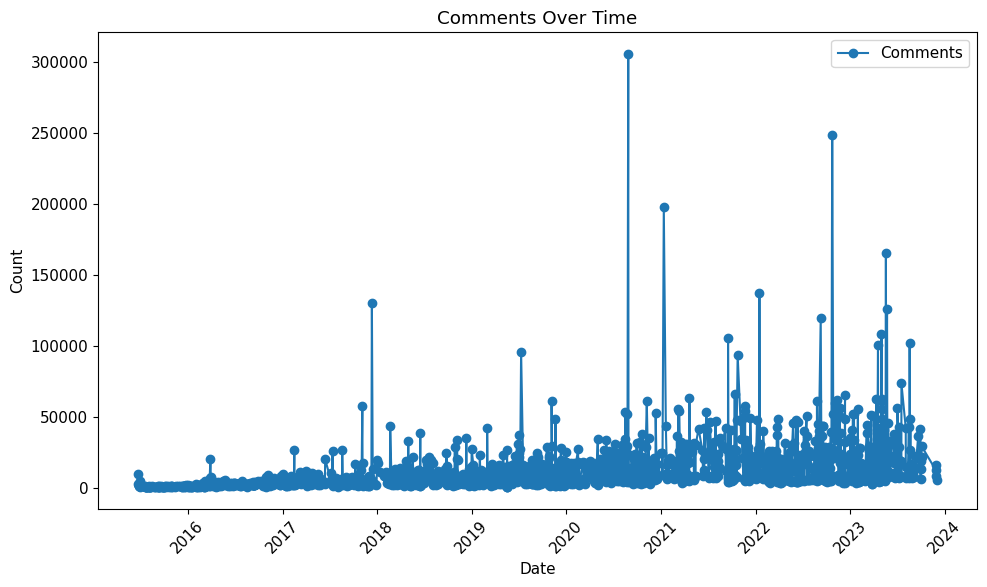

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Date', 'Likes', and 'Comments'
df = df.sort_values(by='Date')

# Plotting
plt.figure(figsize=(10, 6))

# plt.plot(df['Date'], df['Likes'], label='Likes', marker='o')
plt.plot(df['Date'], df['Comments'], label='Comments', marker='o')

plt.title('Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

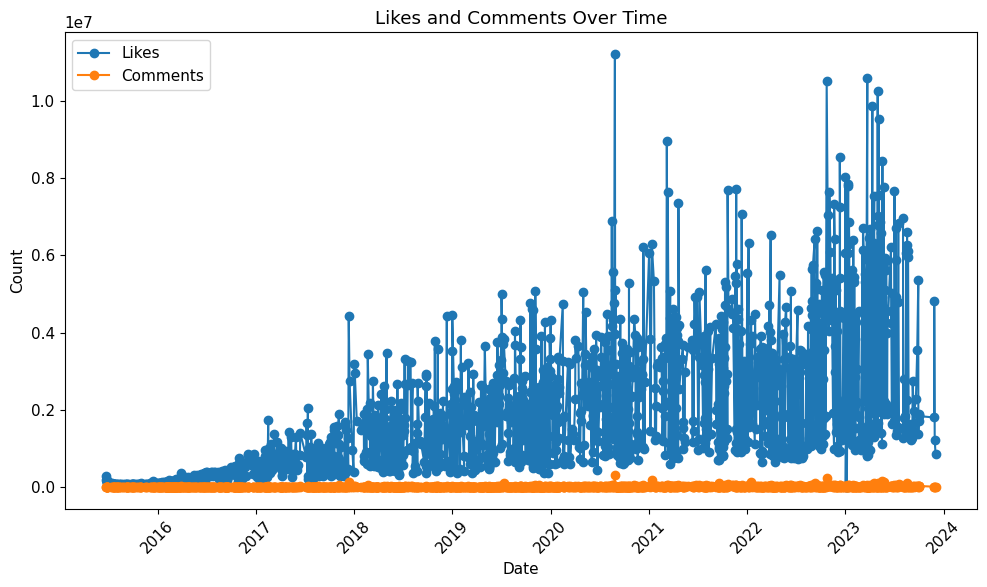

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Date', 'Likes', and 'Comments'
df = df.sort_values(by='Date')

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df['Date'], df['Likes'], label='Likes', marker='o')
plt.plot(df['Date'], df['Comments'], label='Comments', marker='o')

plt.title('Likes and Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [122]:
df.dtypes

Post URL                        object
Date                    datetime64[ns]
Caption                         object
Likes                            int64
Comments                         int64
DayOfWeek                        int64
Month                            int64
HourOfDay                        int64
CaptionLength                    int64
NumHashtags                      int64
NumMentions                      int64
Sentiment                      float64
SentimentCategory                int64
LikesPerPost                   float64
CommentsPerPost                float64
EngagementRate                 float64
NumNER                           int64
KeywordFrequencies               int64
sharpness                      float64
brightness                     float64
contrast                       float64
number_of_faces                  int64
posts_without_people             int64
number_of_objects                int64
dict_of_objects                 object
Year                     

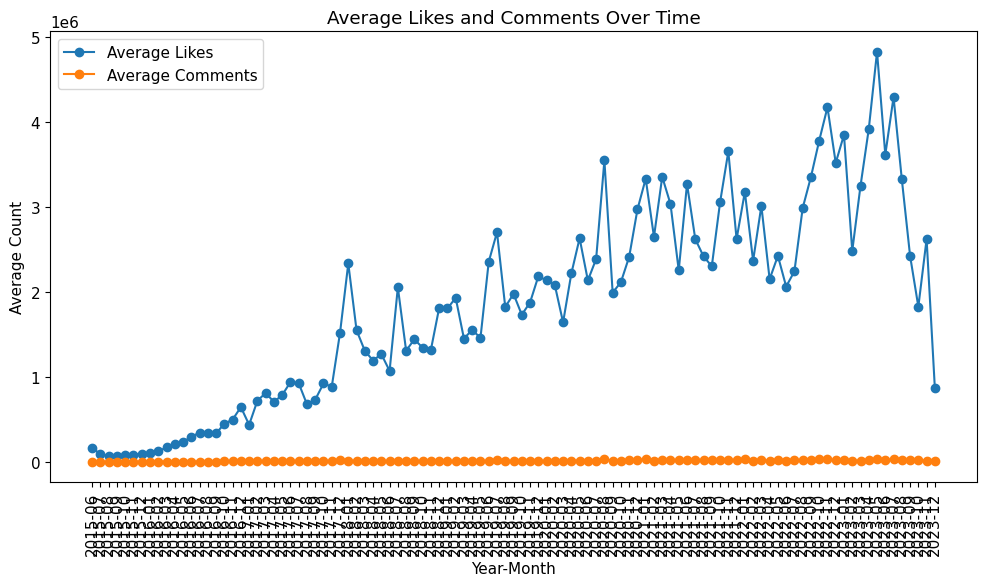

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with 'Date', 'Likes', and 'Comments'
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# Convert 'Likes' and 'Comments' to numeric, replacing non-numeric values with NaN
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Group by YearMonth and take the average of numeric columns
df_avg = df.groupby('YearMonth').agg({'Likes': 'mean', 'Comments': 'mean'})

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_avg.index.astype(str), df_avg['Likes'], label='Average Likes', marker='o')
plt.plot(df_avg.index.astype(str), df_avg['Comments'], label='Average Comments', marker='o')

plt.title('Average Likes and Comments Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


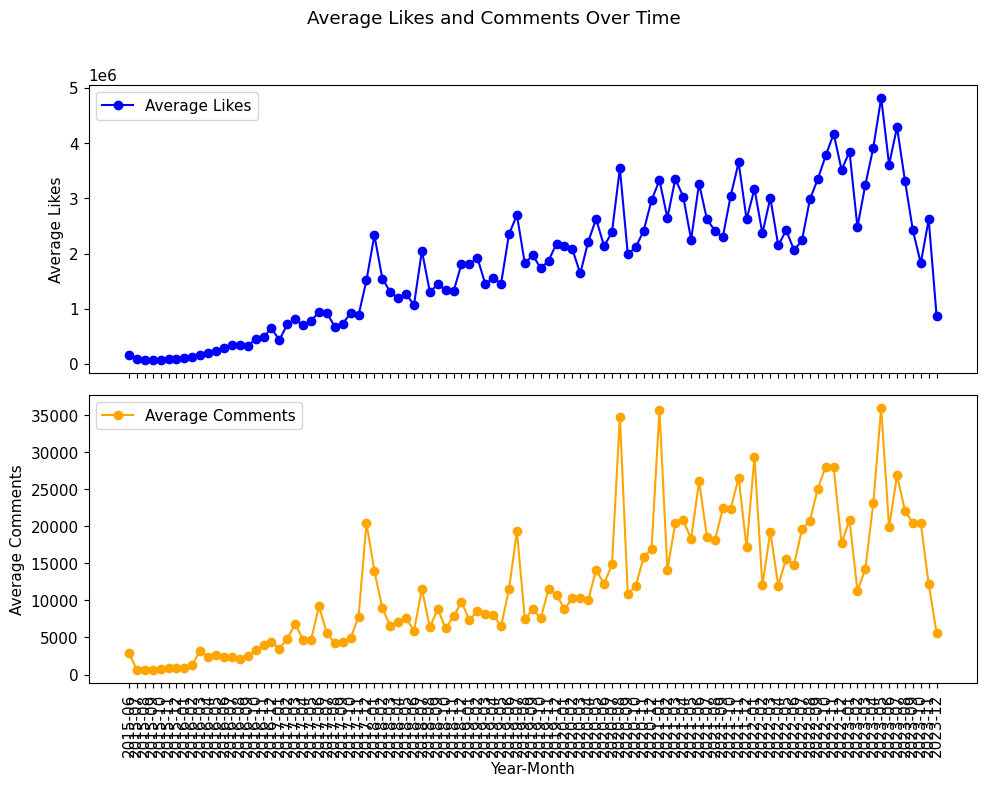

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with 'Date', 'Likes', and 'Comments'
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# Convert 'Likes' and 'Comments' to numeric, replacing non-numeric values with NaN
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Group by YearMonth and take the average of numeric columns
df_avg = df.groupby('YearMonth').agg({'Likes': 'mean', 'Comments': 'mean'})

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax1.plot(df_avg.index.astype(str), df_avg['Likes'], label='Average Likes', marker='o', color='blue')
ax1.set_ylabel('Average Likes')
ax1.legend()

ax2.plot(df_avg.index.astype(str), df_avg['Comments'], label='Average Comments', marker='o', color='orange')
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Average Comments')
ax2.legend()

plt.suptitle('Average Likes and Comments Over Time')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout to prevent clipping of suptitle

# Display the plot
plt.show()


<Axes: xlabel='Year'>

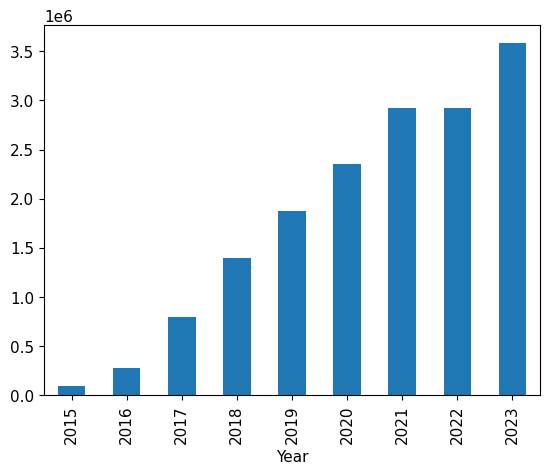

In [133]:
df.groupby('Year')['Likes'].mean().plot.bar()

<Axes: xlabel='Year'>

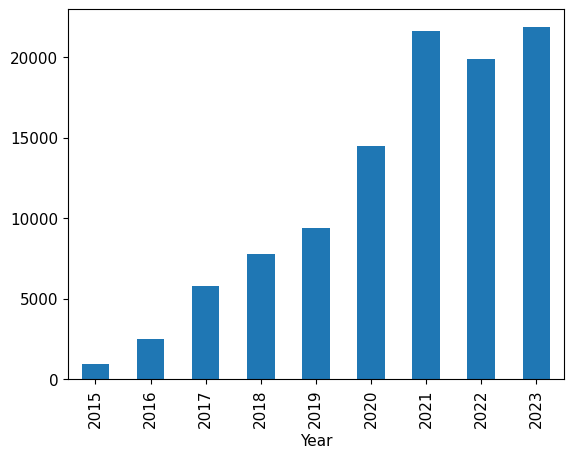

In [134]:
df.groupby('Year')['Comments'].mean().plot.bar()

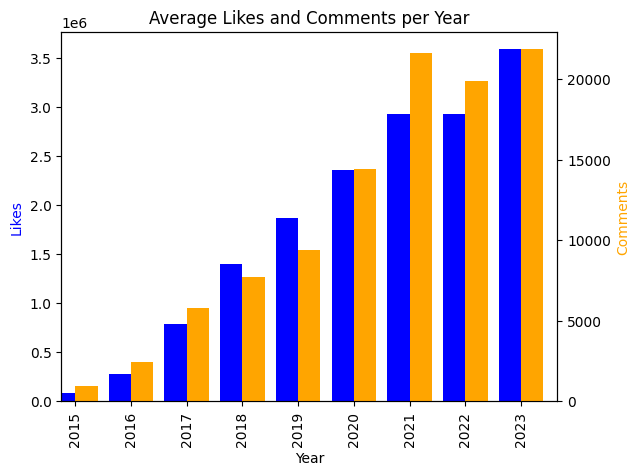

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with columns 'Year', 'Likes', and 'Comments'
# # Example data for illustration
# data = {'Year': [2019, 2019, 2020, 2020, 2021, 2021],
#         'Likes': [100, 150, 200, 120, 180, 220],
#         'Comments': [50, 70, 80, 40, 60, 90]}
# df = pd.DataFrame(data)

# Group by 'Year' and calculate the mean for 'Likes' and 'Comments'
grouped_df = df.groupby('Year')[['Likes', 'Comments']].mean()

fig, ax1 = plt.subplots()

# Plot Likes on the primary y-axis
grouped_df['Likes'].plot(kind='bar', color='blue', ax=ax1, position=1, width=0.4)

# Create a secondary y-axis for Comments
ax2 = ax1.twinx()
grouped_df['Comments'].plot(kind='bar', color='orange', ax=ax2, position=0, width=0.4)

ax1.set_ylabel('Likes', color='blue')
ax2.set_ylabel('Comments', color='orange')

plt.title('Average Likes and Comments per Year')
plt.xlabel('Year')

plt.show()


In [135]:
df.Date = pd.to_datetime(df.Date,format='%d-%m-%Y') 
df.index = df.Date

In [136]:
df.index

DatetimeIndex(['2015-06-23 06:23:25', '2015-06-23 10:17:13',
               '2015-06-25 07:56:04', '2015-06-25 15:59:09',
               '2015-06-26 09:34:59', '2015-06-26 15:49:32',
               '2015-06-27 07:01:43', '2015-06-28 17:46:53',
               '2015-07-02 09:23:01', '2015-07-12 17:25:45',
               ...
               '2023-09-29 04:28:01', '2023-09-29 10:35:21',
               '2023-10-01 05:00:56', '2023-10-01 11:41:16',
               '2023-10-03 08:39:58', '2023-10-03 11:30:46',
               '2023-11-27 05:33:02', '2023-11-27 10:59:44',
               '2023-11-29 05:01:04', '2023-12-02 05:37:14'],
              dtype='datetime64[ns]', name='Date', length=1656, freq=None)

In [59]:
import pandas as pd
import numpy as np

#for visualisations of graphs
import matplotlib.pyplot as plt 
%matplotlib inline

#for datetime object
from datetime import datetime 

#statsmodel libraires
from statsmodels.tsa.stattools import adfuller                 #To check stationarity in Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX         #SARIMA
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing   #Holt's Winter Method

#ARIMA
from pmdarima import auto_arima

#Skit-Learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#Keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



In [60]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is your DataFrame with 'Date' and 'Likes'
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')

# # Convert 'Likes' to numeric, replacing non-numeric values with NaN
# df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')

# # Drop rows with NaN values
# df = df.dropna()

# # Ensure the index is a DatetimeIndex with a frequency (e.g., monthly frequency)
# df.index = pd.to_datetime(df.index)
# df = df.asfreq('M')

# # Perform seasonal decomposition
# result = seasonal_decompose(df['Likes'], model='additive')

# # Plot the decomposition
# result.plot()
# plt.show()

# Assuming df is your DataFrame with 'Date', 'Likes', and 'Comments'
df = pd.read_excel('sample.xlsx')
print(df.columns)

# Convert 'Date' to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Add a day as 1 to the 'YearMonth' column
df['YearMonth'] = df.index.to_period('M').strftime('%Y-%m-01')

# Reset the index to make 'YearMonth' a regular column
df = df.reset_index()

# Convert 'Likes' and 'Comments' to numeric, replacing non-numeric values with NaN
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Group by YearMonth and take the average of numeric columns
df_avg = df.groupby('YearMonth').agg({'Likes': 'mean', 'Comments': 'mean'})

# Display the resulting DataFrame
print(df_avg)


Index(['Unnamed: 0', 'Post URL', 'Date', 'Caption', 'Likes', 'Comments',
       'DayOfWeek', 'Month', 'HourOfDay', 'CaptionLength', 'NumHashtags',
       'NumMentions', 'Sentiment', 'SentimentCategory', 'LikesPerPost',
       'CommentsPerPost', 'EngagementRate', 'NumNER', 'KeywordFrequencies',
       'sharpness', 'brightness', 'contrast', 'number_of_faces',
       'posts_without_people', 'number_of_objects', 'dict_of_objects', 'Year',
       'YearMonth'],
      dtype='object')
                   Likes      Comments
YearMonth                             
2015-06-01  1.676326e+05   2881.500000
2015-07-01  8.683791e+04    658.727273
2015-08-01  6.957009e+04    597.545455
2015-09-01  7.301773e+04    607.933333
2015-10-01  8.002800e+04    811.200000
...                  ...           ...
2023-08-01  3.321672e+06  22121.529412
2023-09-01  2.421675e+06  20448.555556
2023-10-01  1.823292e+06  20443.250000
2023-11-01  2.618750e+06  12176.000000
2023-12-01  8.639340e+05   5596.000000

[103 rows 

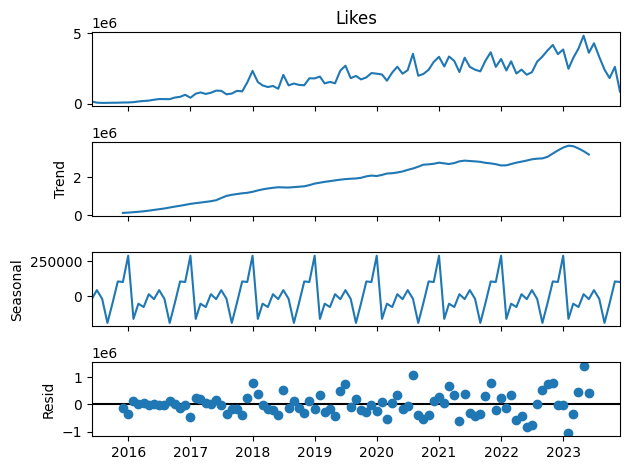

In [61]:
df_avg['YearMonth'] = pd.to_datetime(df_avg.index)
df_avg = df_avg.set_index('YearMonth')

# Perform seasonal decomposition
result = seasonal_decompose(df_avg['Likes'], model='additive', period=12)  # Set the period to 12 for monthly data

# Plot the decomposition
result.plot()
plt.show()

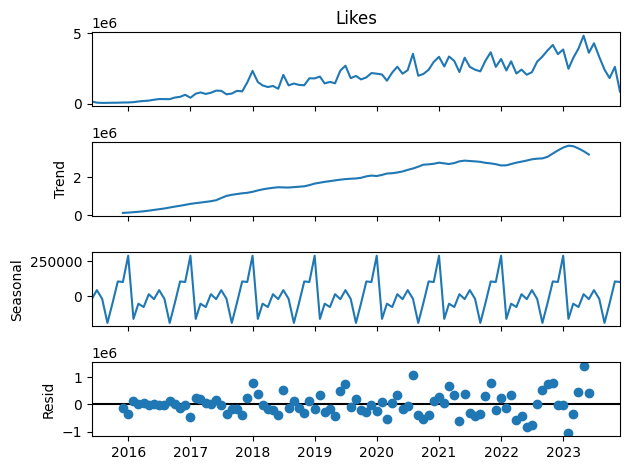

In [5]:
df_avg['YearMonth'] = pd.to_datetime(df_avg.index)
df_avg = df_avg.set_index('YearMonth')

# Perform seasonal decomposition
result = seasonal_decompose(df_avg['Likes'], model='additive')  # Set the period to 12 for monthly data

# Plot the decomposition
result.plot()
plt.show()

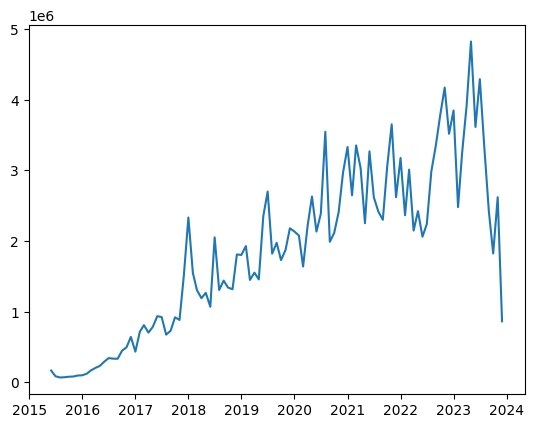

In [6]:
plt.plot(df_avg.index,df_avg.Likes)

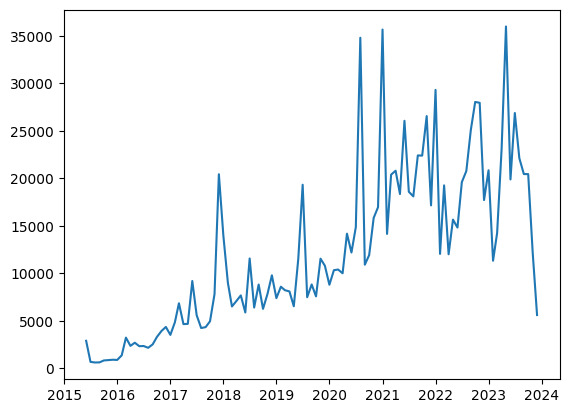

In [7]:
plt.plot(df_avg.index,df_avg.Comments)

In [8]:
train_set = df_avg[:90]['Likes']
test_set = df_avg[90:]['Likes']

In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator

# Assuming df_avg is your DataFrame with 'YearMonth', 'Likes', and 'Comments'
train_set = df_avg[:90]['Likes']
test_set = df_avg[90:]['Likes']

scaler = MinMaxScaler()
scaler.fit(train_set.values.reshape(-1, 1))

scaled_train = scaler.transform(train_set.values.reshape(-1, 1))
scaled_test = scaler.transform(test_set.values.reshape(-1, 1))

n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

model.fit_generator(generator, epochs=50)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


C:\Users\isita\AppData\Local\Temp\ipykernel_7444\1574121403.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=50)


66/66 [==============================] - 2s 7ms/step - loss: 0.0807
Epoch 2/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 3/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 4/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0195
Epoch 5/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 6/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0173
Epoch 7/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0164
Epoch 8/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0181
Epoch 9/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 10/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 11/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 12/50
66/66 [==============================] - 0s 7ms/step - loss: 0.0149
Epoch 13/50
66/66 [==============================] - 1s 8ms/

In [31]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_set)):
    # Get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # Store prediction
    test_predictions.append(current_pred)
    
    # Update batch to now include prediction and drop the first value
    current_batch = np.concatenate([current_batch[:, 1:, :], [[current_pred]]], axis=1)

# Inverse transform the scaled predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions)


1/1 [==============================] - 0s 32ms/step


In [32]:
test_predictions

array([[4543268.89595743],
       [3595197.28334802],
       [2667817.87035705],
       [1936048.81222833],
       [1564462.89734802],
       [1649091.43822967],
       [1978834.37051793],
       [2624013.26509117],
       [3941839.87960074],
       [6049706.6666296 ],
       [6953607.93114804],
       [5792962.53292676],
       [4126335.26847437]])

In [33]:
test_set = pd.DataFrame(test_set)
test_set['predictions'] = test_predictions

In [34]:
test_set

,Likes,predictions
YearMonth,,
2022-12-01,3.514955e+06,4.543269e+06
2023-01-01,3.844768e+06,3.595197e+06
2023-02-01,2.478883e+06,2.667818e+06
2023-03-01,3.244680e+06,1.936049e+06
2023-04-01,3.912961e+06,1.564463e+06
2023-05-01,4.820674e+06,1.649091e+06
2023-06-01,3.611480e+06,1.978834e+06
2023-07-01,4.287978e+06,2.624013e+06
2023-08-01,3.321672e+06,3.941840e+06


In [35]:
error = rmse(test_set['Likes'], test_set['predictions'])
print(error)

2548949.3759118076


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 13, 100)           40800     
                                                                 
 lstm_60 (LSTM)              (None, 13, 100)           80400     
                                                                 
 lstm_61 (LSTM)              (None, 50)                30200     
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151451 (591.61 KB)
Trainable params: 151451 (591.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500


C:\Users\isita\AppData\Local\Temp\ipykernel_7444\1501170068.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=500)


77/77 [==============================] - 4s 8ms/step - loss: 0.0475 - mae: 0.1588 - mse: 0.0475
Epoch 2/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0141 - mae: 0.0921 - mse: 0.0141
Epoch 3/500
77/77 [==============================] - 0s 6ms/step - loss: 0.0185 - mae: 0.1037 - mse: 0.0185
Epoch 4/500
77/77 [==============================] - 0s 6ms/step - loss: 0.0204 - mae: 0.1098 - mse: 0.0204
Epoch 5/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0140 - mae: 0.0902 - mse: 0.0140
Epoch 6/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0181 - mae: 0.1004 - mse: 0.0181
Epoch 7/500
77/77 [==============================] - 0s 6ms/step - loss: 0.0160 - mae: 0.0934 - mse: 0.0160
Epoch 8/500
77/77 [==============================] - 0s 6ms/step - loss: 0.0147 - mae: 0.0956 - mse: 0.0147
Epoch 9/500
77/77 [==============================] - 1s 8ms/step - loss: 0.0140 - mae: 0.0918 - mse: 0.0140
Epoch 10/500
77/77 [====================

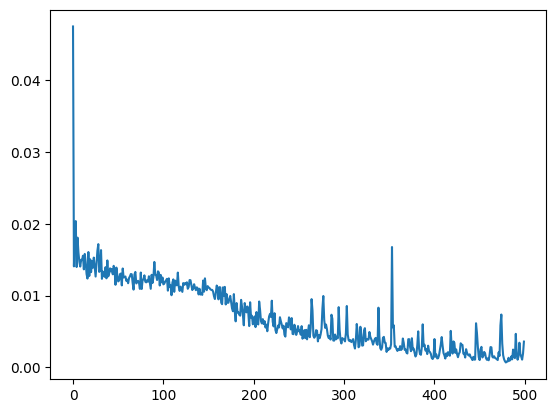

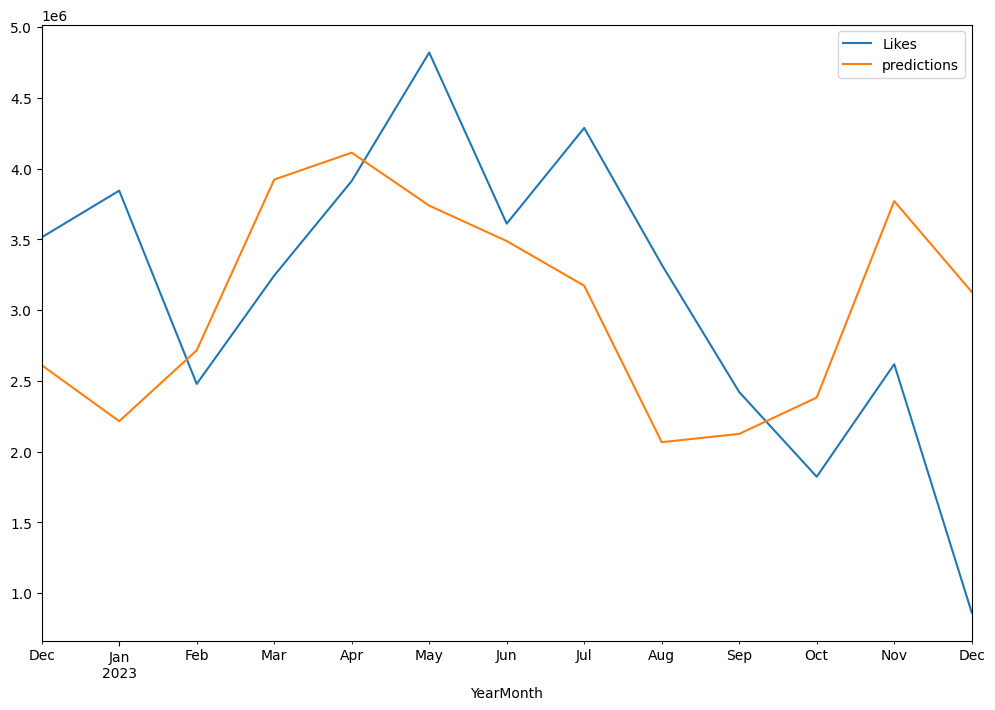

In [52]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tools.eval_measures import rmse

# Assuming df_avg is your DataFrame with 'YearMonth', 'Likes', and 'Comments'
def lstm_model(train_set,col_name):
    train_set = df_avg[:90][col_name]
    test_set = df_avg[90:][col_name]

    scaler = MinMaxScaler()
    scaler.fit(train_set.values.reshape(-1, 1))

    scaled_train = scaler.transform(train_set.values.reshape(-1, 1))
    scaled_test = scaler.transform(test_set.values.reshape(-1, 1))

    n_input = 13
    n_features = 1
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
    model.add(LSTM(100, activation='relu', return_sequences=True))  # Add another LSTM layer
    model.add(LSTM(50, activation='relu'))  # Add one more LSTM layer
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=0.001), loss='mse',metrics= ['mae','mse'])  # Adjust the learning rate
    model.summary()

    model.fit_generator(generator, epochs=500)

    loss_per_epoch = model.history.history['loss']
    plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

    test_predictions = []

    first_eval_batch = scaled_test
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(test_set)):
        # Get prediction 1 time stamp ahead
        current_pred = model.predict(current_batch)[0]
        
        # Store prediction
        test_predictions.append(current_pred)
        
        # Update batch to now include prediction and drop the first value
        current_batch = np.concatenate([current_batch[:, 1:, :], [[current_pred]]], axis=1)

    # Inverse transform the scaled predictions to the original scale
    test_predictions = scaler.inverse_transform(test_predictions)

    test_set = pd.DataFrame(test_set)
    test_set['predictions'] = test_predictions

    error = rmse(test_set[col_name], test_set['predictions'])
    print(error)

    test_set.plot(figsize=(12,8))
    
lstm_model(df_avg, col_name='Likes')

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 13, 100)           40800     
                                                                 
 lstm_51 (LSTM)              (None, 13, 100)           80400     
                                                                 
 lstm_52 (LSTM)              (None, 50)                30200     
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151451 (591.61 KB)
Trainable params: 151451 (591.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500


C:\Users\isita\AppData\Local\Temp\ipykernel_7444\914315266.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=500)


77/77 [==============================] - 5s 12ms/step - loss: 0.0471 - mae: 0.1650 - mse: 0.0471
Epoch 2/500
77/77 [==============================] - 1s 11ms/step - loss: 0.0339 - mae: 0.1343 - mse: 0.0339
Epoch 3/500
77/77 [==============================] - 1s 15ms/step - loss: 0.0264 - mae: 0.1138 - mse: 0.0264
Epoch 4/500
77/77 [==============================] - 1s 13ms/step - loss: 0.0240 - mae: 0.1107 - mse: 0.0240
Epoch 5/500
77/77 [==============================] - 1s 11ms/step - loss: 0.0314 - mae: 0.1244 - mse: 0.0314
Epoch 6/500
77/77 [==============================] - 0s 6ms/step - loss: 0.0264 - mae: 0.1147 - mse: 0.0264
Epoch 7/500
77/77 [==============================] - 1s 15ms/step - loss: 0.0262 - mae: 0.1135 - mse: 0.0262
Epoch 8/500
77/77 [==============================] - 1s 9ms/step - loss: 0.0258 - mae: 0.1103 - mse: 0.0258
Epoch 9/500
77/77 [==============================] - 0s 6ms/step - loss: 0.0243 - mae: 0.1080 - mse: 0.0243
Epoch 10/500
77/77 [==============

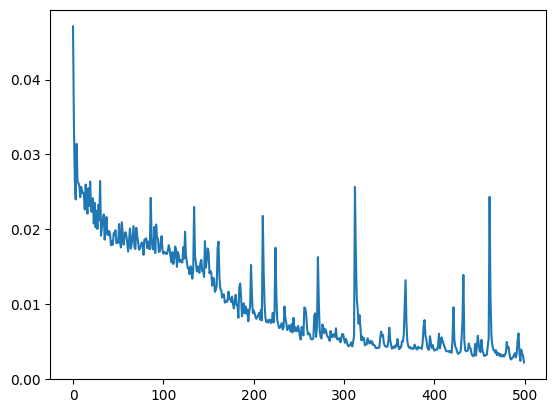

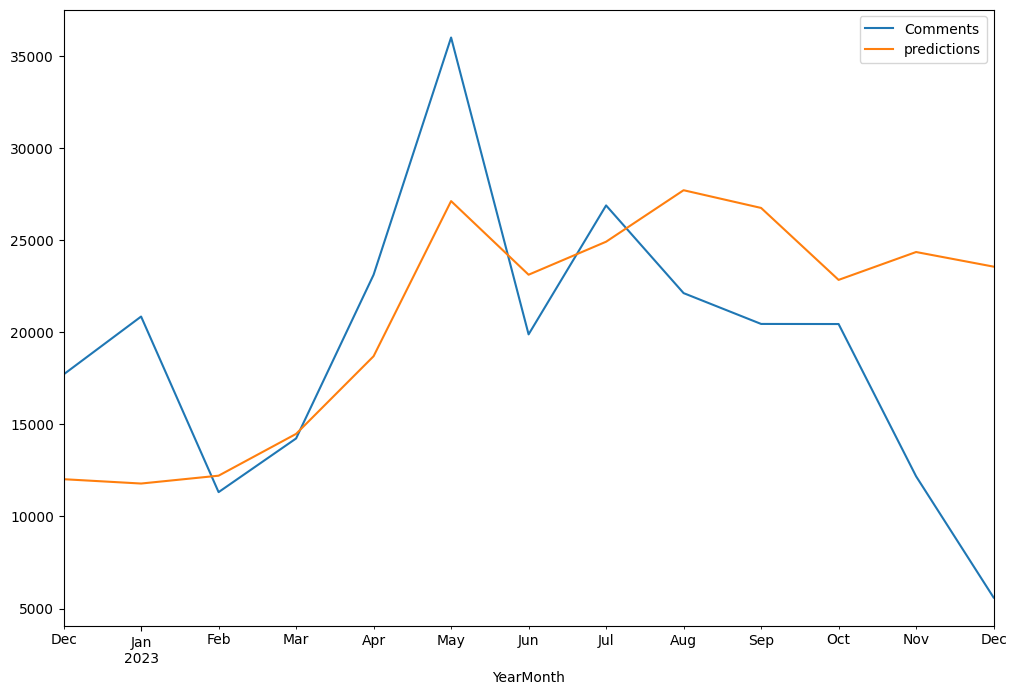

In [49]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tools.eval_measures import rmse

# Assuming df_avg is your DataFrame with 'YearMonth', 'Likes', and 'Comments'
def lstm_model(train_set,col_name):
    train_set = df_avg[:90][col_name]
    test_set = df_avg[90:][col_name]

    scaler = MinMaxScaler()
    scaler.fit(train_set.values.reshape(-1, 1))

    scaled_train = scaler.transform(train_set.values.reshape(-1, 1))
    scaled_test = scaler.transform(test_set.values.reshape(-1, 1))

    n_input = 13
    n_features = 1
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
    model.add(LSTM(100, activation='relu', return_sequences=True))  # Add another LSTM layer
    model.add(LSTM(50, activation='relu'))  # Add one more LSTM layer
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=0.001), loss='mse',metrics= ['mae','mse'])  # Adjust the learning rate
    model.summary()

    model.fit_generator(generator, epochs=500)

    loss_per_epoch = model.history.history['loss']
    plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

    test_predictions = []

    first_eval_batch = scaled_test
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(test_set)):
        # Get prediction 1 time stamp ahead
        current_pred = model.predict(current_batch)[0]
        
        # Store prediction
        test_predictions.append(current_pred)
        
        # Update batch to now include prediction and drop the first value
        current_batch = np.concatenate([current_batch[:, 1:, :], [[current_pred]]], axis=1)

    # Inverse transform the scaled predictions to the original scale
    test_predictions = scaler.inverse_transform(test_predictions)

    test_set = pd.DataFrame(test_set)
    test_set['predictions'] = test_predictions

    error = rmse(test_set[col_name], test_set['predictions'])
    print(error)

    test_set.plot(figsize=(12,8))
    
lstm_model(df_avg, col_name='Comments')

In [176]:
test_set= test_set[:-1]

In [155]:
df_avg.index

PeriodIndex(['2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
             '2015-12', '2016-01', '2016-02', '2016-03',
             ...
             '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
             '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]', name='YearMonth', length=103)

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is df with the features we engineered
# Drop any rows with missing values
df = df.dropna()

# Define features and target

X = df[['DayOfWeek','Year', 'Month', 'HourOfDay', 'CaptionLength', 'NumHashtags', 'NumMentions', 'Sentiment', 'SentimentCategory', 'NumNER',
        'KeywordFrequencies', 'sharpness', 'brightness', 'contrast', 'number_of_faces','posts_without_people','number_of_objects']]
y = df[['Likes', 'Comments']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


# Evaluate the model
mse_likes = mean_squared_error(y_test['Likes'], y_pred[:, 0])
mse_comments = mean_squared_error(y_test['Comments'], y_pred[:, 1])

print(f'Mean Squared Error (Likes): {mse_likes}')
print(f'Mean Squared Error (Comments): {mse_comments}')

Mean Squared Error (Likes): 1031331791079.0175
Mean Squared Error (Comments): 111212920.28010187


In [102]:
y_test[:5] , y_pred[:5]

(        Likes  Comments
 192   1636557      5642
 1246   947414      6517
 821    874469      3835
 1169  1423134      5980
 285   3665896     18451,
 array([[ 2.2138e+06,       13436],
        [ 2.5041e+06,       17596],
        [ 2.1805e+06,       12598],
        [ 1.2646e+06,      9452.3],
        [ 3.8333e+06,       24008]]))

In [103]:
# Get the coefficients
coefficients = model.coef_

# Map coefficients to features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Print or visualize the feature importance
print(feature_importance)


                 Feature   Coefficient
1                   Year  4.308545e+06
4          CaptionLength  3.324126e+06
11             sharpness  1.148634e+06
2                  Month  5.552262e+05
13              contrast  5.081314e+05
16     number_of_objects  3.931317e+05
7              Sentiment  3.687992e+05
3              HourOfDay  3.622351e+05
12            brightness  3.539279e+05
14       number_of_faces  3.335562e+05
8      SentimentCategory  1.661990e+05
0              DayOfWeek  4.934598e+04
15  posts_without_people -3.744158e+05
9                 NumNER -8.717140e+05
6            NumMentions -1.624735e+06
10    KeywordFrequencies -2.496599e+06
5            NumHashtags -5.325639e+06
